In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot

data = pd.read_csv('/mnt/data/housing.csv')

data = data.dropna()

X, y = data['median_income'].values, data['median_house_value'].values
m = y.size

# Normalizar
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

def graficarDatos(x, y):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro', markersize=0.8)
  pyplot.xlabel('Ingreso mediano (normalizado)')
  pyplot.ylabel('Valor mediano de vivienda (normalizado)')


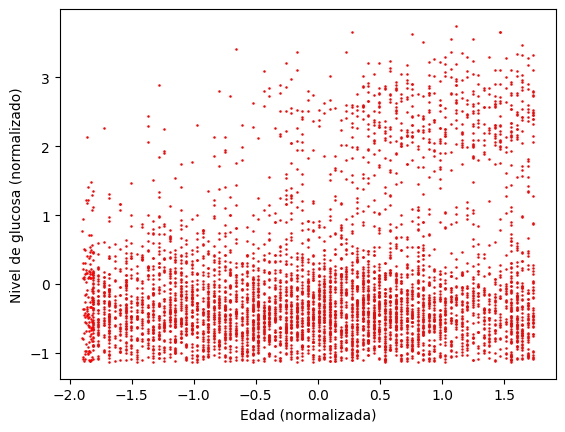

In [53]:
graficarDatos(X, y)

In [ ]:
X = np.stack([np.ones(m), X], axis=1)

def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

theta=np.array([0.1, 0.0])
JJ = calcularCosto(X, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

con theta:[0.1 0. ] se obtiene un costo de: 0.5050000000000002


In [55]:
theta = np.zeros(2)

num_ite = 1000
alpha = 0.01

theta, J_historico = calcularDescensoGradiente(X, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

los valores de theta calculados son: [1.25383509e-17 2.35827974e-01]
con un costo de: 0.47219018228766085 


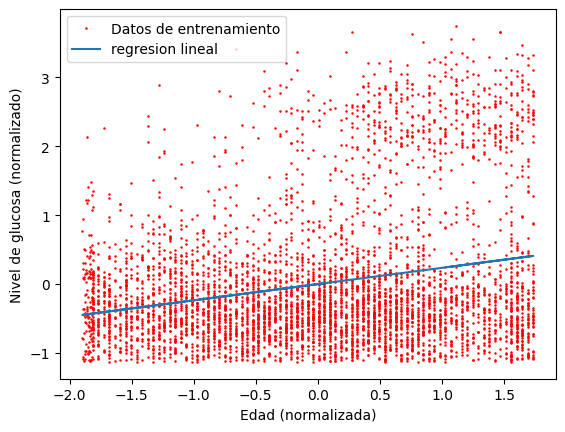

In [56]:
graficarDatos(X[:, 1], y)
pyplot.plot(X[:,1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [ ]:
ingreso_norm = (5 - data['median_income'].mean()) / data['median_income'].std()
y_pred = np.dot([1, ingreso_norm], theta)
print(f'Predicción normalizada para ingreso mediano=5: {y_pred}')

valor_real = y_pred * data['median_house_value'].std() + data['median_house_value'].mean()
print(f'Valor estimado de vivienda: {valor_real:.2f} USD')


Predicción normalizada para 65 años: 0.23143149844277452
Nivel de glucosa estimado: 115.59 mg/dL
